In [1]:
from pyciss.ringcube import RingCube
import numpy as np
from matplotlib import pyplot as plt

/home/chab/miniconda3/envs/py36/lib/python3.6/site-packages/pysis/env.py:33: RuntimeWarning: Could not find isis. Is `ISISROOT` set?
  warnings.warn('Could not find isis. Is `ISISROOT` set?', RuntimeWarning)
/home/chab/miniconda3/envs/py36/lib/python3.6/site-packages/pyciss/meta.py:93: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  all_resonances = pd.concat([prime_resonances, prime_jan_epis])


/home/chab/miniconda3/envs/py36/lib/python3.6/site-packages/pysis/cubefile.py:113: RuntimeWarning: invalid value encountered in less
  data[data < self.specials['Min']] = numpy.NINF
/home/chab/miniconda3/envs/py36/lib/python3.6/site-packages/pysis/cubefile.py:114: RuntimeWarning: invalid value encountered in greater
  data[data > self.specials['Max']] = numpy.inf


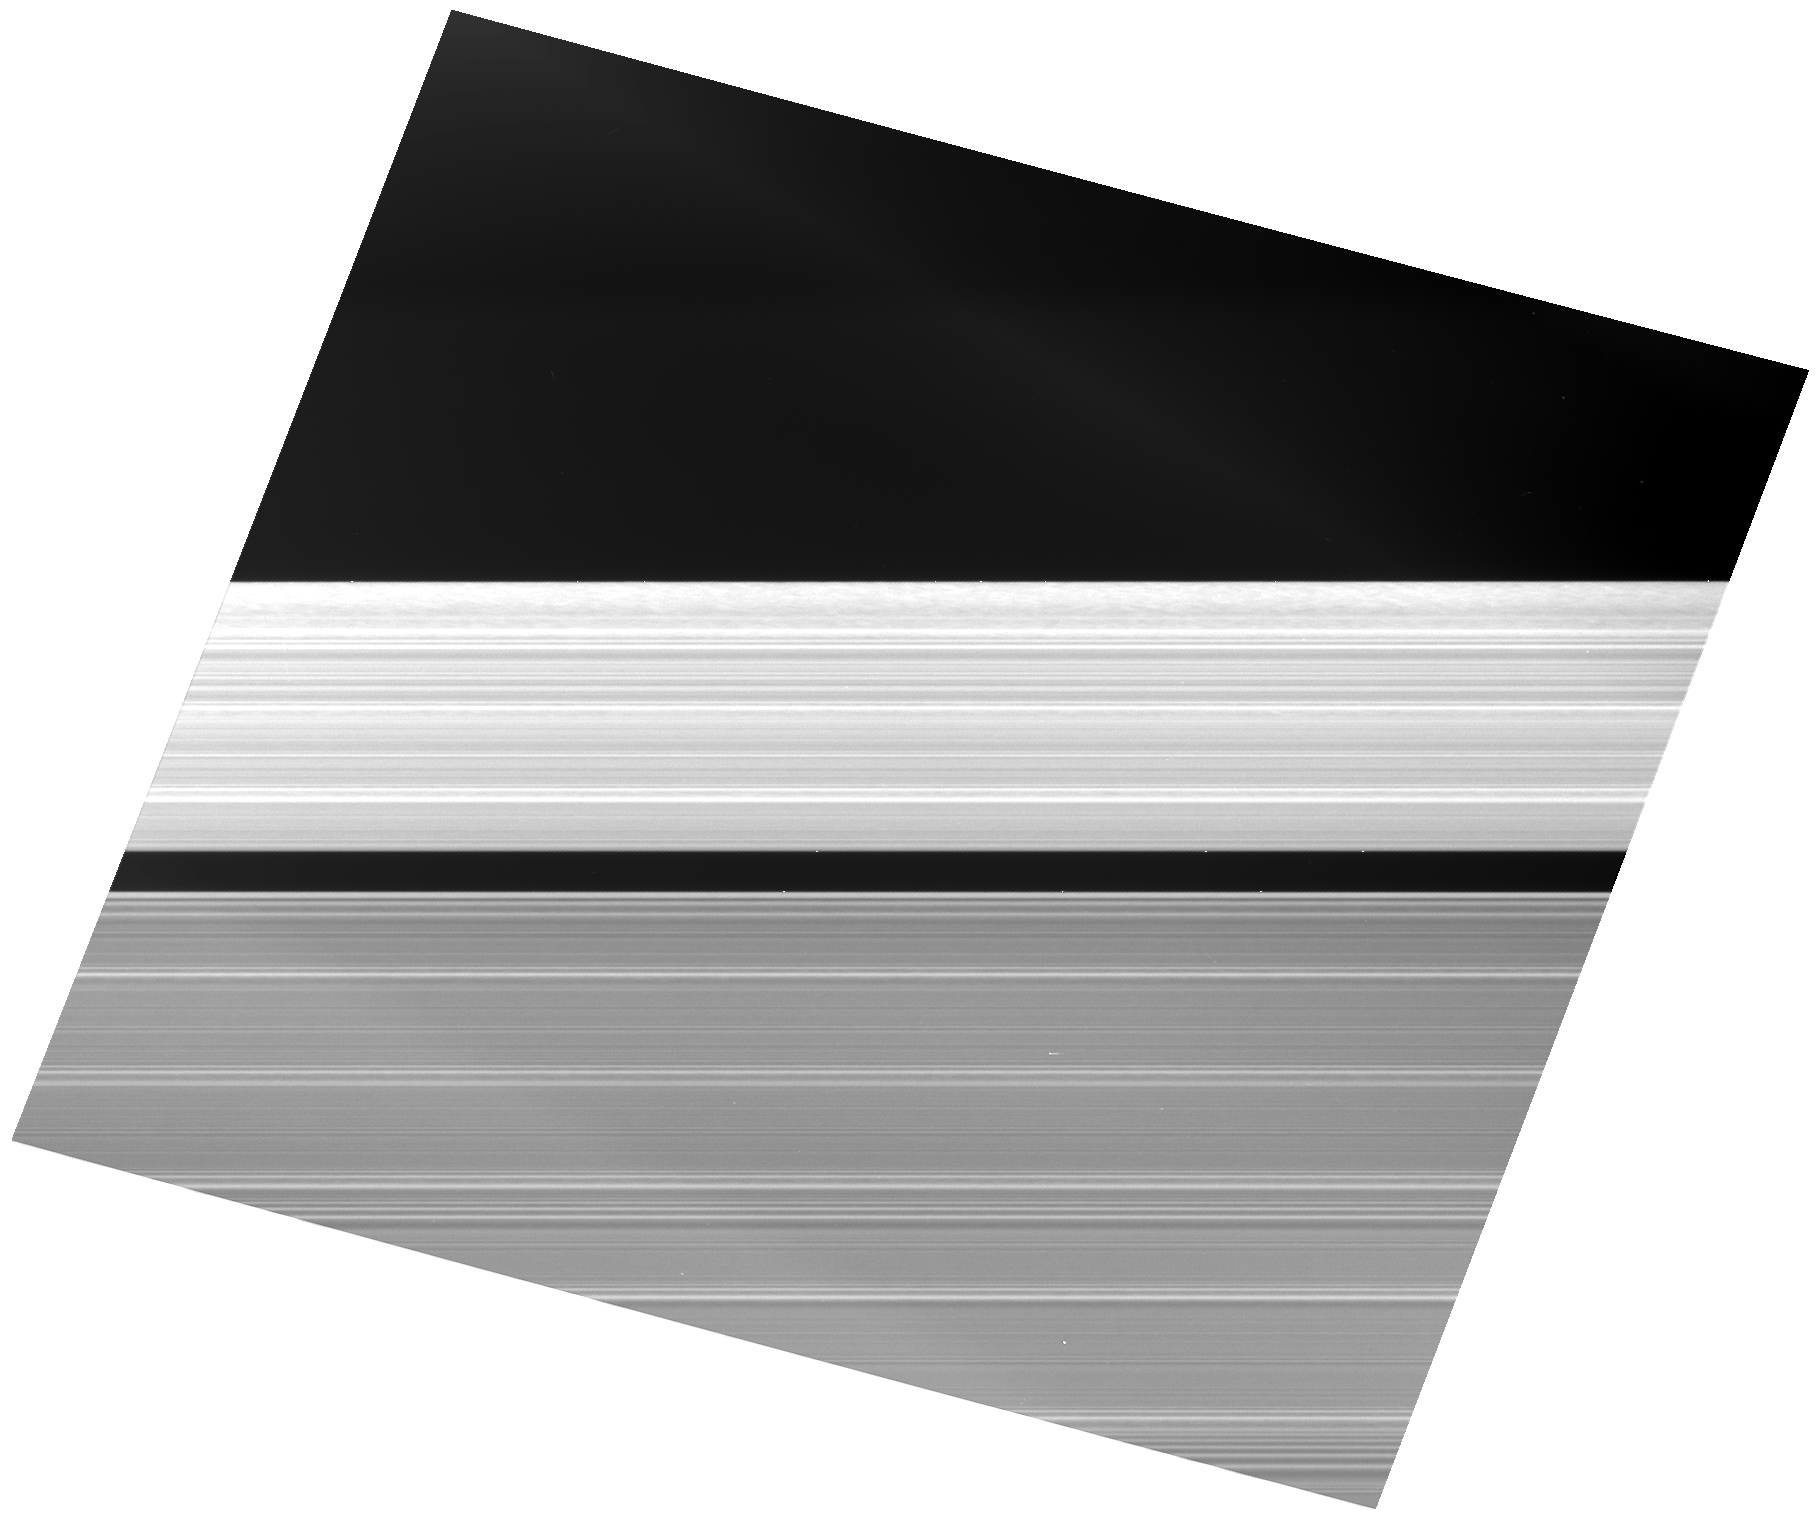

In [2]:
#Gap & Ring Edge - Test Image - No function - Horizontal
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

#Producing the image:
#~~~~~~~~~~~~~~~~~~~~
test1 = RingCube('N1584974162')
#test1.imshow()  #Gives the default plot with axes labels and all

#Setting up the data array to plot
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
data1 = test1.img
extent_val1 = test1.extent
min_1, max_1 = np.percentile(data1[~np.isnan(data1)], (1, 99))

#Using plt.savefig
#~~~~~~~~~~~~~~~~~
fig = plt.figure(dpi=100, frameon=False)
ax = plt.axes([0,0,1,1])
fig.set_size_inches(17.99,15.01)  #this is the shape of data1
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.axis('off')
#plt.ylim([135.833,137.33388])
#plt.xlim([92.61034,93.364817])
plt.imshow(data1, extent=extent_val1, cmap='gray', vmin=min_1, vmax=max_1, interpolation='none', origin='lower', aspect='auto')
plt.savefig('test1_savefig.png', dpi=100, format='png', bbox_inches='tight', frameon=False, pad_inches=0)
plt.show()
plt.close()

#Using plt.imsave
#~~~~~~~~~~~~~~~
#plt.imsave('test1_imsave.png',data1,vmin=min_1,vmax=max_1,cmap='gray',format='png',origin='lower')

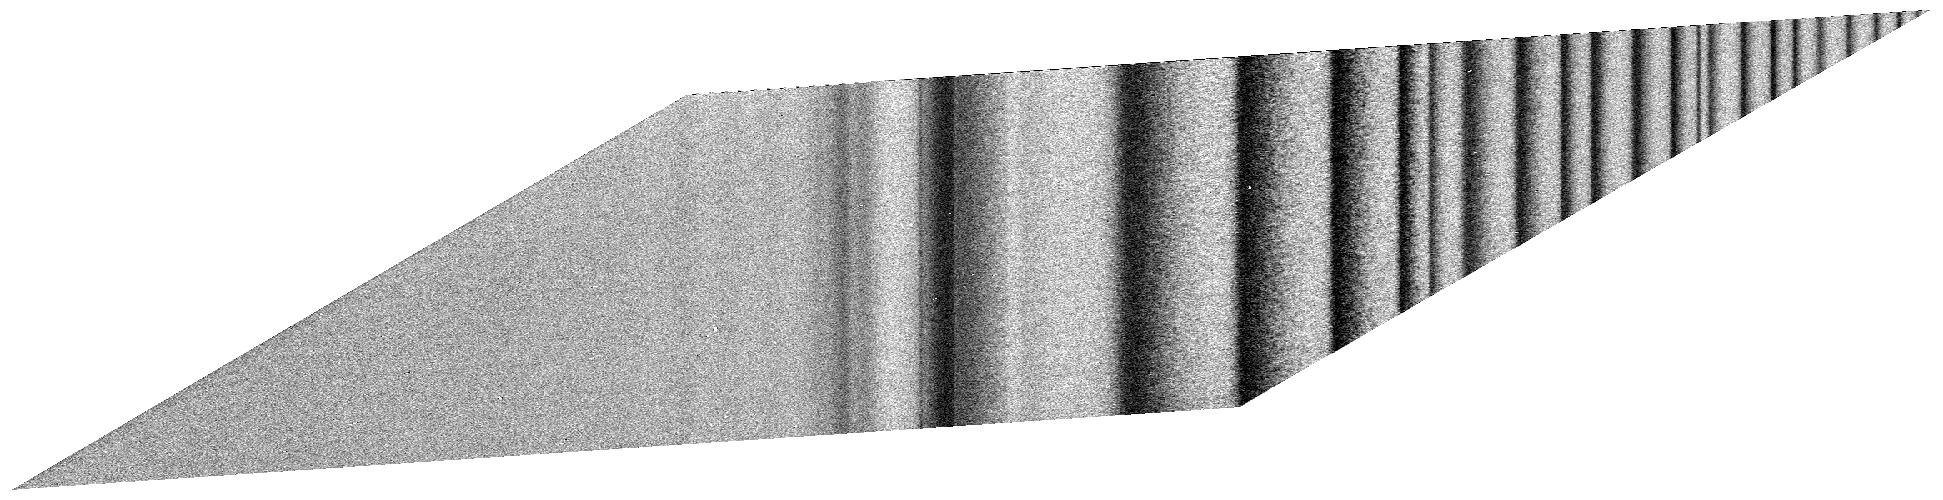

In [34]:
#Function for image saving
#~~~~~~~~~~~~~~~~~~~~~~~~~
def RingImage(filename, width=True, height=True, save=True, show=True):
    cube = RingCube(filename)
    data = cube.img
    extent_val = cube.extent
    min_, max_ = np.percentile(data[~np.isnan(data)], (1, 99))
    w = data.shape[0] / 100.
    h = data.shape[1] / 100.
    lonMin = cube.minlon.value
    lonMax = cube.maxlon.value
    radMin = cube.minrad.value
    radMax = cube.maxrad.value
    
    fig = plt.figure(dpi=100, frameon=False)
    ax = plt.axes([0,0,1,1])
    if type(width) == float:
        fig.set_size_inches(width, height)
    else:
        fig.set_size_inches(w, w/4.)
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.axis('off')
    plt.imshow(data.T,extent=extent_val,cmap='gray',vmin=min_,vmax=max_,interpolation='none',origin='lower',aspect='auto')
    plt.ylim([radMin,radMax])
    plt.xlim([lonMin,lonMax])
    if save == True:
        plt.savefig(filename+'_img.png',dpi=100,format='png',bbox_inches='tight',pad_inches=0,frameon=False)
    else:
        pass
    if show == True:
        plt.show()
    else:
        pass
    plt.close()
    return

#RingImage('N1584974162',save=True,show=True)
RingImage('N1467345680',save=True,show=True)
#RingImage('N1467344745')#anomoly
#RingImage('N1467345680')

In [19]:
import subprocess
p = subprocess.Popen("file test1_savefig.png", stdout=subprocess.PIPE, shell=True)
(output, err) = p.communicate()
print(output)

b'test1_savefig.png: PNG image data, 1799 x 1501, 8-bit/color RGBA, non-interlaced\n'


In [8]:
from pyciss import plotting
#plotting??

In [21]:
#Gap & Ring Edge - Test Plot - No function - Horizontal - No Show
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
ifs1 = np.nanmedian(data1, axis=1)
ifs1 = np.nan_to_num(ifs1)
ifs1[ifs1 < 0] = 0

fig = plt.figure(dpi=100,facecolor='white')
ax = plt.axes([0,0,1,1])
fig.set_size_inches(17.99,15.01)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.axis('off')
plt.plot(ifs1, np.linspace(*test1.extent[2:], data1.shape[0]), color='black', lw=1.3)
plt.xlim([0.015,0.034])
plt.ylim([135.83300002163,137.3338767189])
#plt.show()
plt.close()

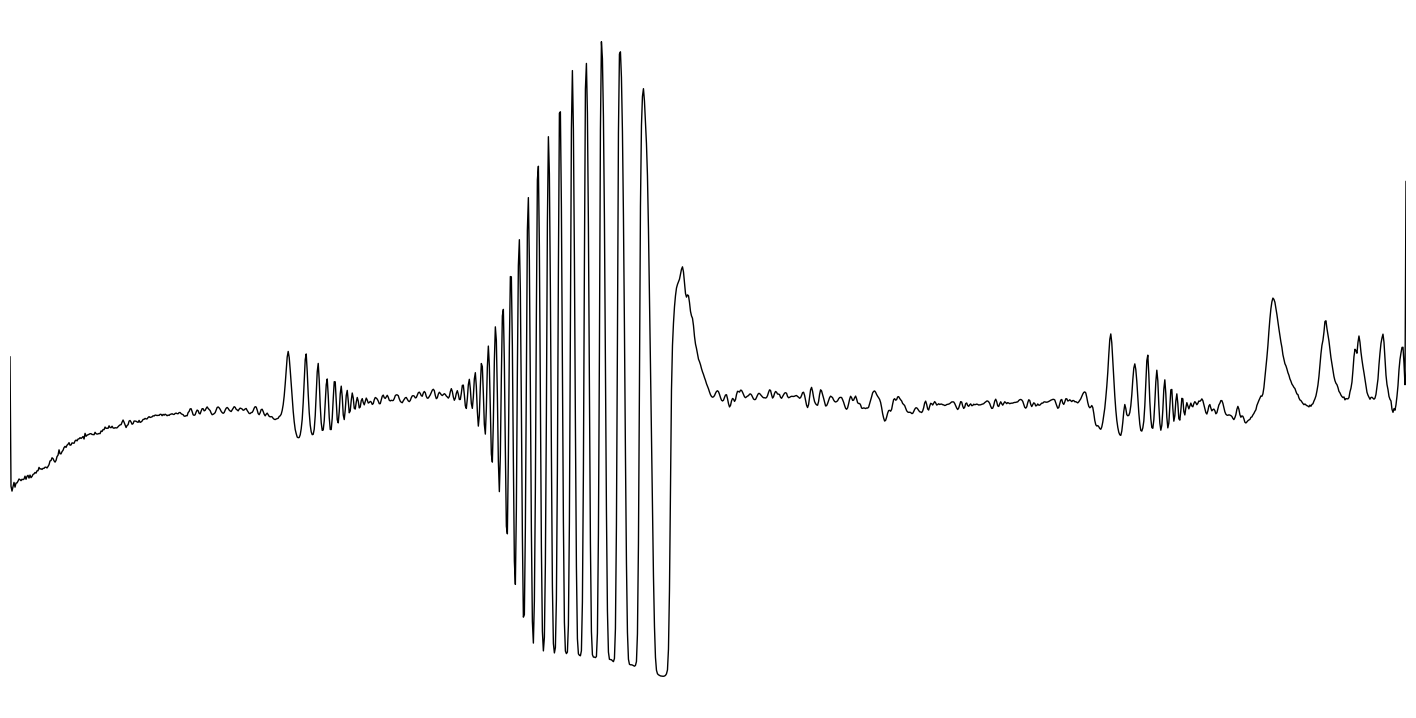

1396


In [46]:
#Function for plot saving
#~~~~~~~~~~~~~~~~~~~~~~~~
def plotDisplay(filename, save=True, show=True):
    cube = RingCube(filename)
    data = cube.img
    extent_val = cube.extent
    min_, max_ = np.percentile(data[~np.isnan(data)], (1, 99))
    w = data.shape[0] / 100.
    h = data.shape[1] / 100.
    lonMin = cube.minlon.value
    lonMax = cube.maxlon.value
    radMin = cube.minrad.value
    radMax = cube.maxrad.value
    
    ifs = np.nanmedian(data, axis=1)
    ifs = np.nan_to_num(ifs)
    ifs[ifs < 0] = 0
    
    #ifsN = ifs
    #ifsN[np.where(ifs < (np.median(ifs)-(0.2*np.median(ifs))))] = (np.median(ifs)-(0.2*np.median(ifs)))
    
    fig = plt.figure(facecolor='white', dpi=100)
    ax = plt.axes([0,0,1,1])
    fig.set_size_inches(w,w/2.)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.axis('off')
    plt.plot(np.linspace(*cube.extent[2:], data.shape[0]), ifs, color='black', lw=1)
    plt.xlim([radMin,radMax])
    if save == True:
        plt.savefig(filename+'_plt.png',dpi=100,format='png',bbox_inches='tight',pad_inches=0,frameon=False)
    else:
        pass
    if show == True:
        plt.show()
    else:
        pass
    plt.close()
    
    #plt.savefig(filename+'_plt.png', dpi=100, format='png', bbox_inches='tight', pad_inches=0)
    #plt.show()
    #plt.close()
    print(ifs.size)
    return

#plotDisplay('N1467344745') #soleton
#plotDisplay('N1467345680', save=True, show=True) #soleton
#plotDisplay('N1467351049')  #both sides drop
#plotDisplay('N1560312042', save=False, show=True)  #good
#plotDisplay('N1584974162', save=False, show=True)  #OG
#plotDisplay('N1595337686')  #low left side
#plotDisplay('N1595338008')  #both
plotDisplay('N1595338491', save=False, show=True)  #good?
#plotDisplay('N1597806864')  #left up, big gap, right drop
#plotDisplay('N1625958972')  #mid gap
#plotDisplay('N1654249612')  #mid gap, right drop
#plotDisplay('N1868840683')  #left gap

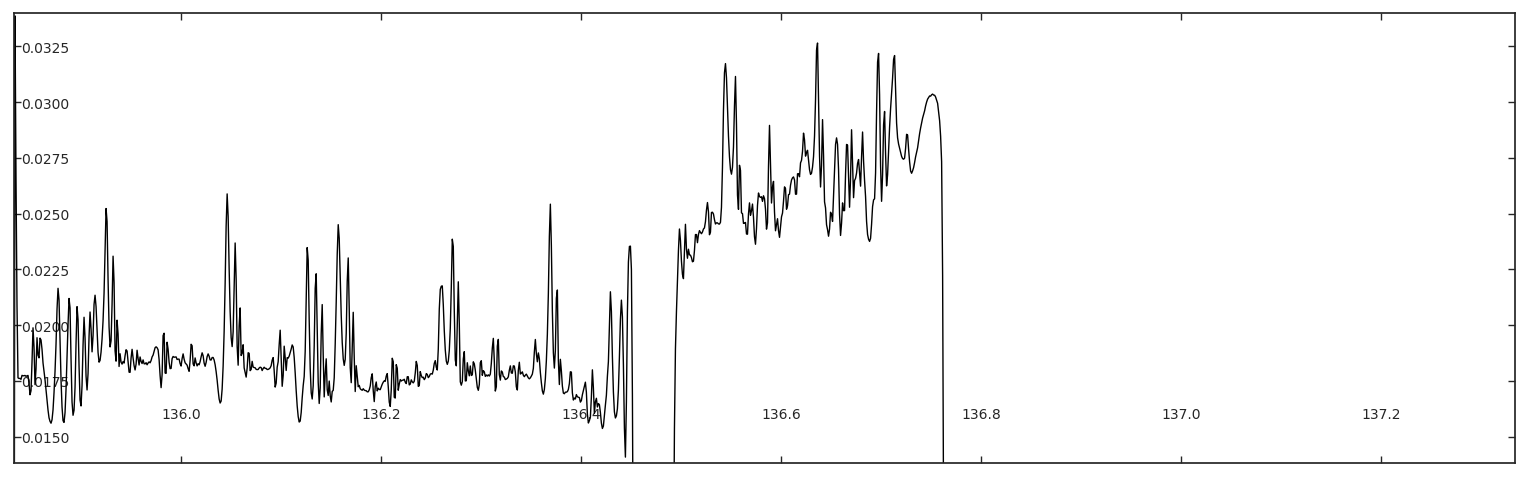

In [52]:
#Intensity plot: Rotated /#Cutoff
#ifsN = ifs
#ifsN[np.where(ifs < (np.median(ifs)-(0.2*np.median(ifs))))] = (np.median(ifs)-(0.2*np.median(ifs)))

fig = plt.figure(facecolor='white', dpi=100)
#ax = fig.add_subplot(1, 1, 1)
ax = plt.axes([0,0,1,1])
#fig.set_size_inches(15.01,17.99)
fig.set_size_inches(1501/100,4.5)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
#plt.axis('off')

plt.plot(np.linspace(*test1.extent[2:], data.shape[0]), ifs, color='black', lw=1)
#plt.ylim([0.0,0.034])
plt.ylim([(np.median(ifs)-(0.2*np.median(ifs))),0.034])
plt.xlim([135.83300002163,137.3338767189])
plt.savefig('plot1_with_axes.png', dpi=100, format='png', bbox_inches='tight', pad_inches=0)
plt.show()

In [45]:
ifsMed = np.median(ifs)
ifsMean = np.mean(ifs)
MedDiffMean = np.abs(ifsMed - ifsMean)
Med20Diff = np.abs(ifsMed - (0.2 * ifsMed))

0.01727127656340599
0.017985606731674438


In [ ]:
#Intensity plot: Pipeline
ifs = np.nanmedian(data, axis=1)
ifs = np.nan_to_num(ifs)
ifs[ifs < 0] = 0

ifsN = ifs
ifsNnp.where(ifs < (np.median(ifs)-(0.2*np.median(ifs))))] = (np.median(ifs)-(0.2*np.median(ifs)))

fig = plt.figure(facecolor='white', dpi=100)
ax = plt.axes([0,0,1,1])
fig.set_size_inches(15.01,8.)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.axis('off[')
plt.plot(np.linspace(*test1.extent[2:], data.shape[0]), ifsN, color='black', lw=1)
plt.ylim([(np.median(ifs)-(0.2*np.median(ifs))),0.034])
plt.xlim([135.83300002163,137.3338767189])
plt.savefig('plot1_savefigRot.png', dpi=100, format='png', bbox_inches='tight', pad_inches=0)
plt.show()

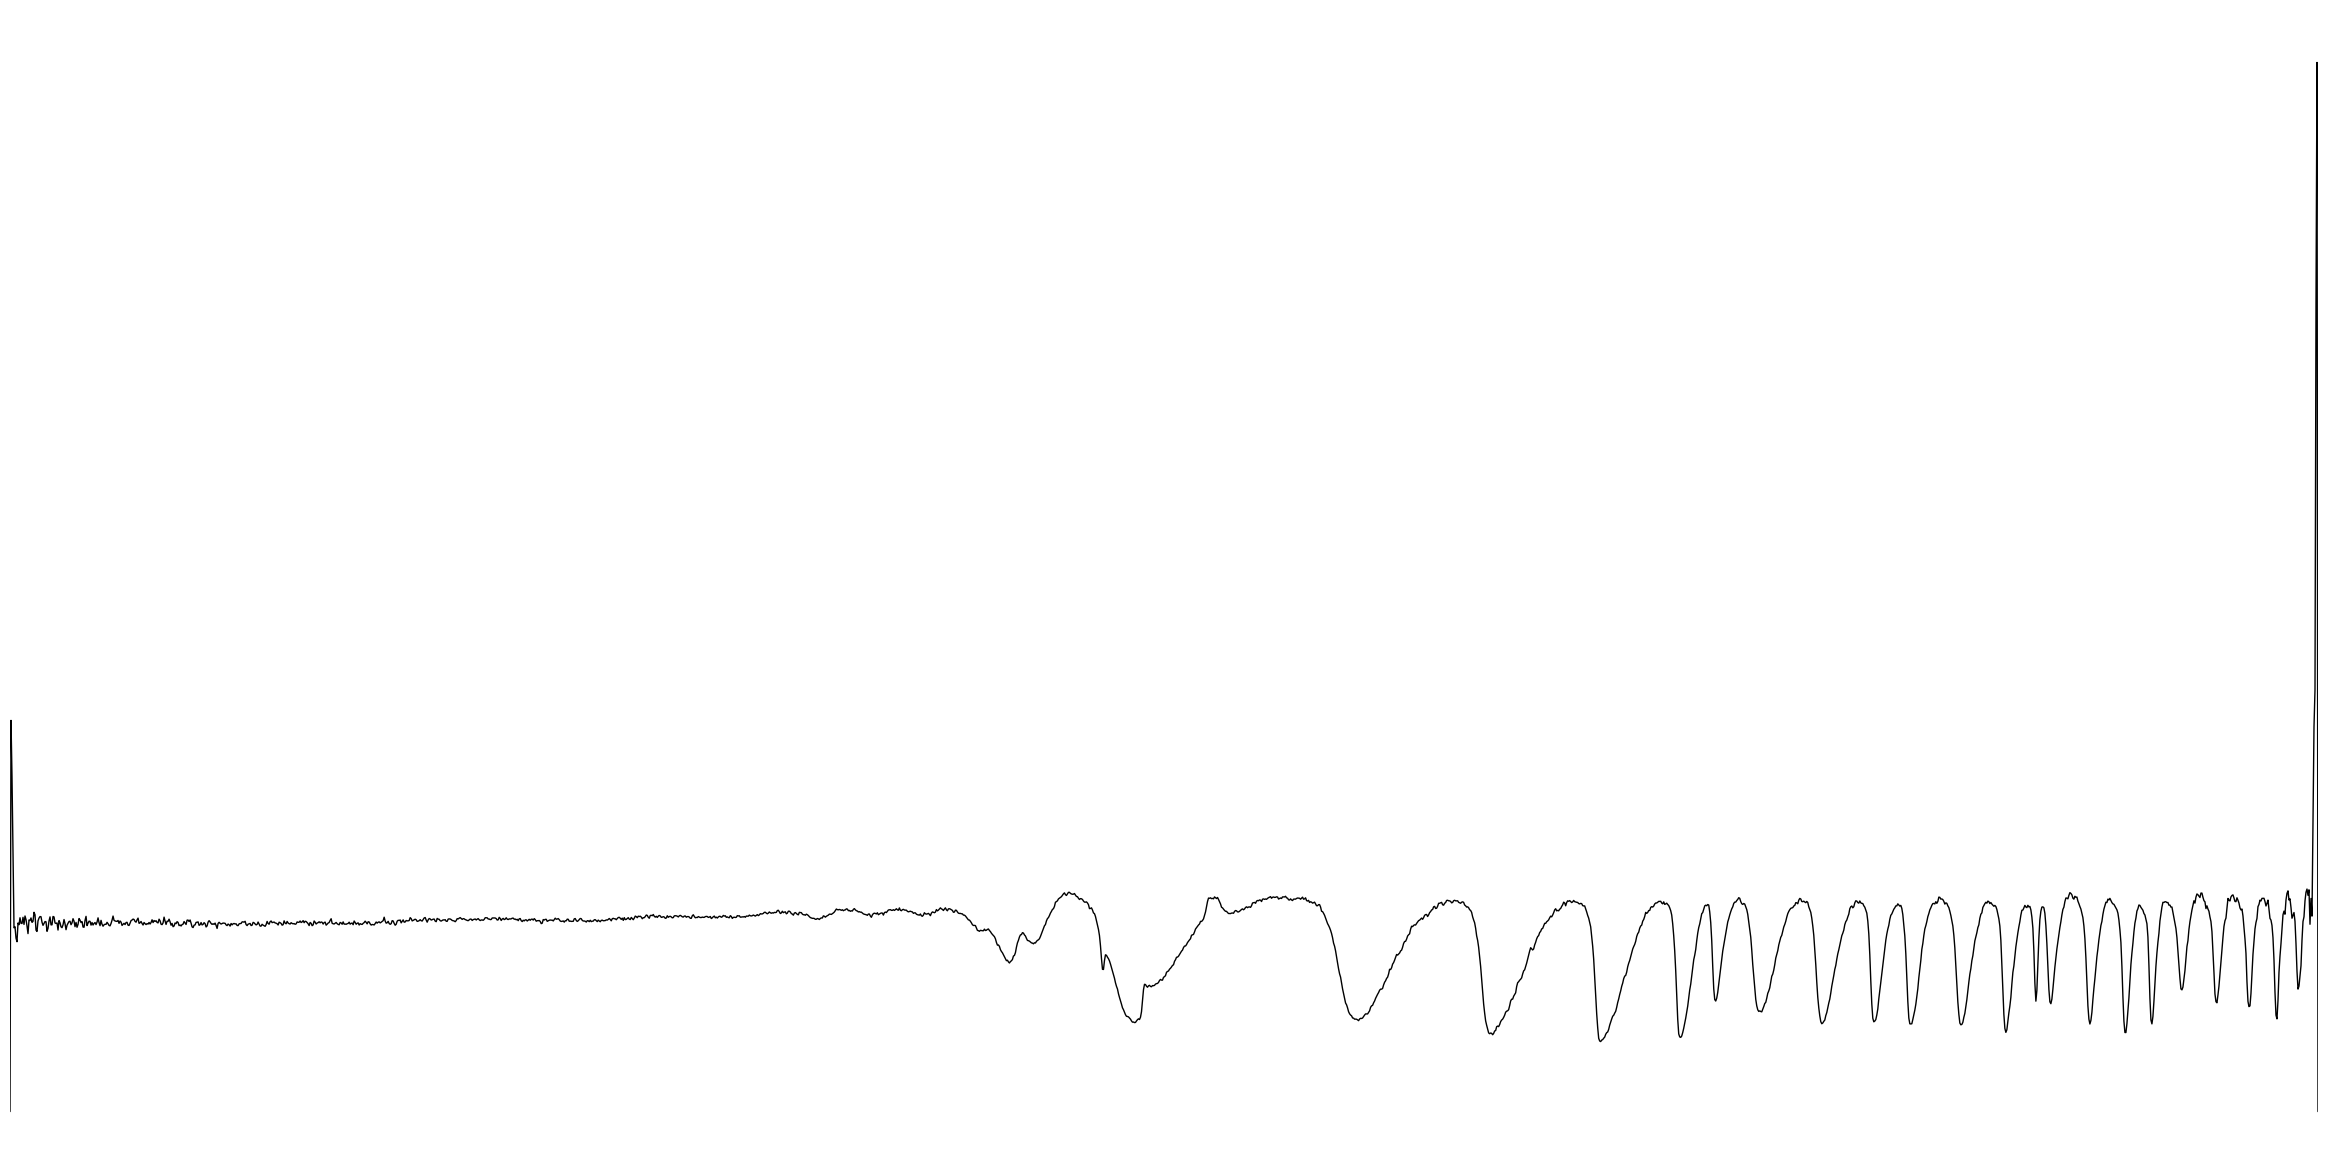

2308


In [83]:
#Plot display pipeline
def plotDisplay(filename):
    cube = RingCube(filename)
    data = cube.img
    extent_val = cube.extent
    min_, max_ = np.percentile(data[~np.isnan(data)], (1, 99))
    w = data.shape[0] / 100.
    h = data.shape[1] / 100.
    
    ilonMin = cube.minlon.value   #cube.mapping_label['MinimumRingLongitude']
    ilonMax = cube.maxlon.value   #cube.mapping_label['MaximumRingLongitude']
    iradMin = cube.mapping_label['MinimumRingRadius'] / 1.0e6
    iradMax = cube.mapping_label['MaximumRingRadius'] / 1.0e6
    
    ifsN = np.nanmedian(data, axis=1)
    ifsN = np.nan_to_num(ifsN)
    ifsN[ifsN < 0] = 0
    
    #print(int(ifsN.size/2))
    #print(np.median(np.sort(ifsN)[:int(ifsN.size/4)]))
    #print(np.median(ifsN))

    #ifsN = ifs
    #ifsN[np.where(ifs < (np.median(ifs)-(0.2*np.median(ifs))))] = (np.median(ifs)-(0.2*np.median(ifs)))
    
    fig = plt.figure(facecolor='white', dpi=100) #whenever using subplots:  ,constrained_layout=True)
    ax = plt.axes([0,0,1,1])
    fig.set_size_inches(w,w/2.)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.axis('off')
    plt.plot(np.linspace(*cube.extent[2:], data.shape[0]), ifsN, color='black', lw=1)
    #plt.ylim([(np.median(ifs)-(0.2*np.median(ifs))),0.034])
    plt.xlim([iradMin,iradMax])
    plt.savefig('./12img_1.0/'+filename+'_12plt_1.0.png', dpi=100, format='png', bbox_inches='tight', pad_inches=0)
    plt.show()
    plt.close()
    print(ifsN.size)
    return


#plotDisplay('N1467344745') #soleton
plotDisplay('N1467345680') #soleton
#plotDisplay('N1467351049')  #both sides drop
#plotDisplay('N1560312042')  #good
#plotDisplay('N1584974162')  #OG
#plotDisplay('N1595337686')  #low left side
#plotDisplay('N1595338008')  #both
#plotDisplay('N1595338491')  #good?
#plotDisplay('N1597806864')  #left up, big gap, right drop
#plotDisplay('N1625958972')  #mid gap
#plotDisplay('N1654249612')  #mid gap, right drop
#plotDisplay('N1868840683')  #left gap

(96.22412303917615, 96.43624578433685)


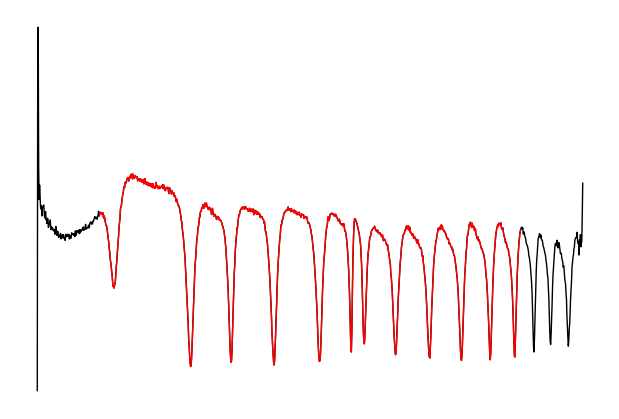

In [54]:
icube = RingCube('N1467344745')
idata = icube.img
#extent_val = cube.extent
#min_, max_ = np.percentile(data[~np.isnan(data)], (1, 99))
#w = data.shape[0] / 100.
#h = data.shape[1] / 100.
#lonMin = cube.mapping_label['MinimumRingLongitude']
#lonMax = cube.mapping_label['MaximumRingLongitude']
#    radMin = cube.mapping_label['MinimumRingRadius'] / 1.0e6
#    radMax = cube.mapping_label['MaximumRingRadius'] / 1.0e6
#    
ifs_N = np.nanmedian(idata, axis=1)
ifs_N = np.nan_to_num(ifs_N)
ifs_N[ifs_N < 0] = 0
    
    #ifsN = ifs
    #ifsN[np.where(ifs < (np.median(ifs)-(0.2*np.median(ifs))))] = (np.median(ifs)-(0.2*np.median(ifs)))
    
fig = plt.figure(facecolor='white', dpi=100)
ax = plt.axes([0,0,1,1])
#fig.set_size_inches(10,10)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.axis('off')
plt.plot(np.linspace(*icube.extent[2:], idata.shape[0]), ifs_N, color='black', lw=1)
plt.plot(np.linspace(*icube.extent[2:], idata.shape[0])[134:-134], ifs_N[134:-134], color='red', lw=1)

#plt.ylim([(np.median(ifs)-(0.2*np.median(ifs))),0.034])
#plt.ylim([lonMin,lonMax])
#plt.xlim([radMin,radMax])
print(plt.xlim())
#plt.xlim([134.141488102368,135.27866293109201])
#plt.savefig('plot1_savefigRot.png', dpi=100, format='png', bbox_inches='tight', pad_inches=0)
plt.show()

In [40]:
import pandas as pd
#def calc_offset(cube):
#    i = 0
#    while pd.Series(cube.img[:, i]).count() < 200:
#        i += 1
#    return max(i, 20)
i = 0
while pd.Series(icube.img[:, i]).count() < 20:
    i += 1

print(max(i, 20))

27


23.08 5.4175


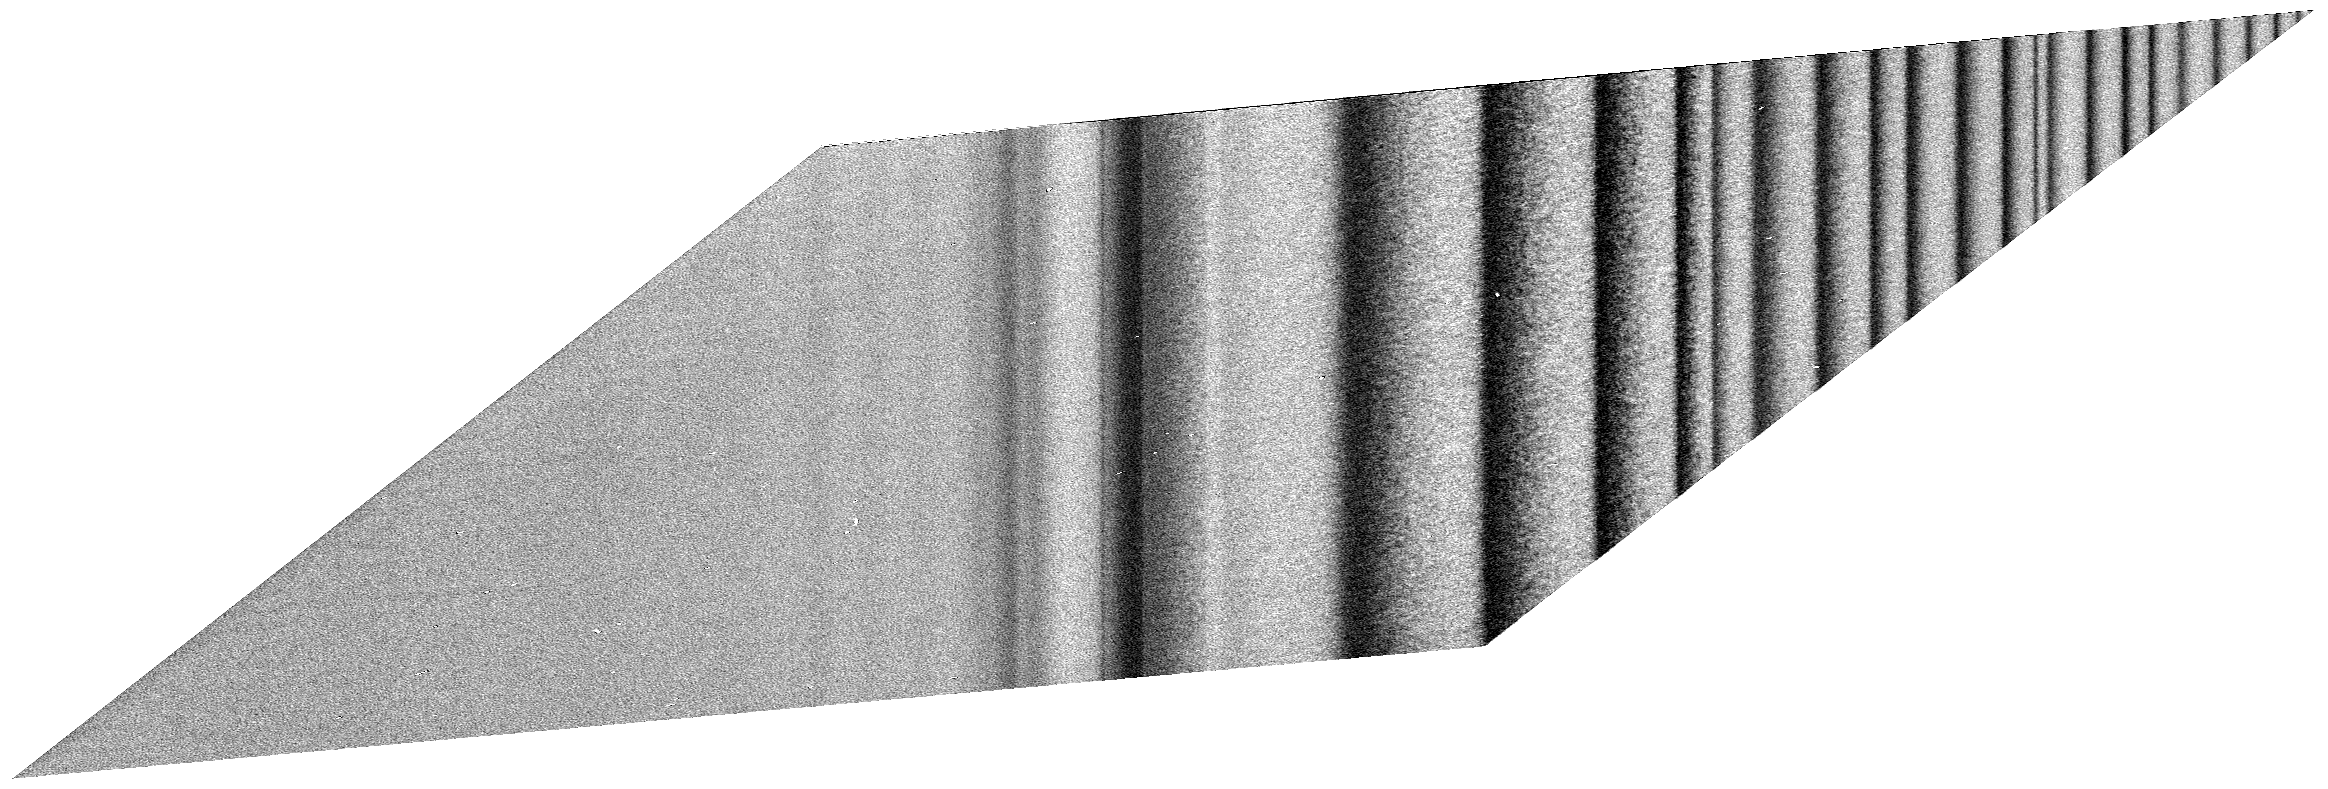

(2308, 2167)


In [81]:
#Pipeline for everything shortened
#~~~~~~~~~~~~~~~~~~~~~~~~
def RingImage(filename):
    cube = RingCube(filename)
    data = cube.img
    extent_val = cube.extent
    min_, max_ = np.percentile(data[~np.isnan(data)], (1, 99))
    w = data.shape[0] / 100.
    h = data.shape[1] / 100.
    print(w,h/4)
    lonMin = cube.minlon.value
    lonMax = cube.maxlon.value
    radMin = cube.minrad.value
    radMax = cube.maxrad.value
    
    fig = plt.figure(dpi=100, frameon=False)
    ax = plt.axes([0,0,1,1])
    fig.set_size_inches(w,w/3)
    
    #ax.tick_params(axis='both',which='major',direction='in',length=5,width=1,labelsize=10,pad=-40,bottom=True,top=True,left=True,right=True,labelbottom=True,labelleft=True)
    
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    plt.axis('off')
    plt.imshow(data.T,extent=extent_val,cmap='gray',vmin=min_,vmax=max_,interpolation='none',origin='lower',aspect='auto')
    plt.ylim([radMin,radMax])
    plt.xlim([lonMin,lonMax])
    plt.savefig('./12img_1.0/'+filename+'_12img_1.0.png',dpi=100,format='png',bbox_inches='tight',pad_inches=0,frameon=False)
    plt.show()
    plt.close()
    print(data.shape)
    return

#RingImage('N1467344745') #soleton
RingImage('N1467345680') #soleton
#RingImage('N1467351049')#WAY Too big
#RingImage('N1560312042')
#RingImage('N1584974162')
#RingImage('N1595337686')
#RingImage('N1595338008')
#RingImage('N1595338491')
#RingImage('N1597806864')
#RingImage('N1625958972')
#RingImage('N1654249612')
#RingImage('N1868840683')


#plotDisplay('N1467351049')  #both sides drop
#plotDisplay('N1560312042')  #good
#plotDisplay('N1584974162')  #OG
#plotDisplay('N1595337686')  #low left side
#plotDisplay('N1595338008')  #both
#plotDisplay('N1595338491')  #good?
#plotDisplay('N1597806864')  #left up, big gap, right drop
#plotDisplay('N1625958972')  #mid gap
#plotDisplay('N1654249612')  #mid gap, right drop
#plotDisplay('N1868840683')  #left gap

In [44]:
RingCube('N1868840683').shape

(1, 1213, 2220)